<a href="https://colab.research.google.com/github/jonas080301/datenbasierte-verfahren/blob/main/DV_01_ComplicatedFunction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

:# Workshop Artificial Intelligence
## Interpolation
**In this task, we implement a simple neuronal network to learn a complicated function.**

The following code imports necessary libraries for working with neural networks and plotting. The numpy library is imported as np for numerical operations, the tensorflow.keras module is imported for building and training neural networks and matplotlib.pyplot is imported for creating plots. The code then imports the layers module from tensorflow.keras.

In [1]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

layers = keras.layers

### Generation of data

The following code defines a function that takes a numerical input x and computes a complex mathematical expression (normally unknown).

In [2]:
def some_complicated_function(x):
    return (
        (np.abs(x)) ** 0.5
        + 0.1 * x # + or -
        + 0.01 * x ** 2 # factor between 0.01 and 1
        + 1 # number between 0 and 100
        - np.sin(x)
        + 0.5 * np.exp(x / 10.0)
        ) / (0.5 + np.abs(np.cos(x)))

**Simulate test data**

The following code generates synthetic testing data for evaluating a neural network (normally measured). It specifies the number of testing samples (N_test) and creates a linearly spaced array of input data (x_test) spanning the range [-10, 10]. The corresponding output data (y_test) is obtained by using the previously defined some_complicated_function to the input data. The purpose of this code is to create a separate set of data for testing the trained neural network's performance on unseen examples.

Text(0, 0.5, 'some_complicated_function(x)')

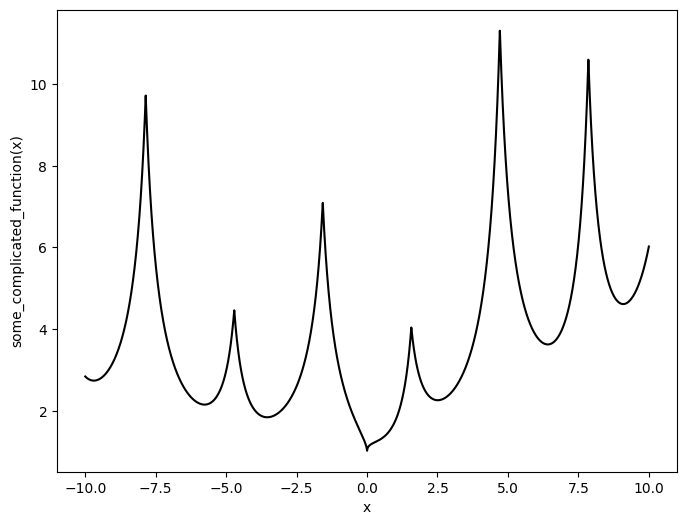

In [3]:
import numpy as np
# define number of testing samples
N_test = 10 ** 4

# compute input and output data for testing
x_test = np.linspace(-10, 10, N_test)
y_test = some_complicated_function(x_test)

# plot test data
plt.figure(figsize = (8, 6))
plt.plot(x_test, y_test, color = "black", label = "data")
plt.xlabel('x')
plt.ylabel('some_complicated_function(x)')

**Let's simulate the train data**

The following code generates synthetic training data for training a neural network (normally measured). It specifies the number of training samples (N_train) and generates random input data (x_train) uniformly distributed in the range [-10, 10]. The corresponding output data (y_train) is obtained by using the previously defined some_complicated_function to the input data and adding some random noise generated by np.random.standard_normal.

In [5]:
# define number of training samples
N_train = 10 ** 4

# compute input and output data for training
x_train = np.random.uniform(-10, 10, N_train)[:, np.newaxis]
y_train = some_complicated_function(x_train) + np.random.standard_normal(x_train.shape)

# print input and output data
print("Shape x_train:", x_train.shape)
print("Shape y_train:", y_train.shape)
print(N_train)

Shape x_train: (10000, 1)
Shape y_train: (10000, 1)
10000


### Define Model

**Define the number of nodes, the number of layers, and choose an activation function.**
Use `keras.regularizers` to use parameter norm penalties or add a dropout layer via `layers.Dropout(fraction)`.

The following code defines a neural network model using the Keras API within TensorFlow. The model architecture is sequential, with an input layer, multiple hidden layers (specified by nb_layers), and an output layer. The activation function used throughout the network is Rectified Linear Unit (ReLU), as indicated by the variable activation. The number of nodes in each layer is set to nb_nodes. The input dimension of the first layer is determined by the shape of the training data (x_train). The model is named "1Dfit". The model.summary() statement prints a summary of the model architecture, providing details such as the number of parameters in each layer and the overall model structure.

In [7]:
# define number of nodes, number of layers and the activation function
n_nodes = 100
n_layers = 5
activation = 'relu'

# generate neural network model
model = keras.models.Sequential(name = "1Dfit")
model.add(layers.Input(shape = (x_train.shape[1], )))
for i in range(1, n_layers):
    model.add(layers.Dense(n_nodes, activation = activation)) # hidden layer
model.add(layers.Dense(1))  # output layer

# print summary of model
print(model.summary())

Model: "1Dfit"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,601 (119.54 KB)

 Trainable params: 30,601 (119.54 KB)

 Non-trainable params: 0 (0.00 B)

None


### Compile the model (set an objective and choose an optimizer)

**Choose an optimizer** from `keras.optimizers`, e.g., `adam = keras.optimizers.Adam(learning_rate = 0.001)`.

Further, choose the correct objective (loss) for this <b>regression task</b>.

The following code compiles the neural network model using the Adam optimizer with a specified learning rate of 0.001 and a mean squared error (MSE) loss function. The keras.optimizers.Adam class is used to create an Adam optimizer instance. This optimizer is then passed to the model.compile function. Compiling a model is a necessary step before training, and it involves specifying the optimizer and the loss function that the model will use during the training process. The choice of Adam optimizer with MSE loss is common for a regression task, aiming to minimize the mean squared error between predicted and actual values during training.

In [8]:
# compile neural network model
adam = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss = "MSE", optimizer = adam)

### Train the model

**Train the network for a couple of epochs and save the model several times in between.**

The following code configures and initiates the training of the neural network model. The training process involves running the model on the training data (x_train and y_train) for a specified number of epochs (100 in this case). Additionally, the callback function ModelCheckpoint is utilized, which saves the model's weights at specified intervals during training (every 25 epochs in this case). The saved weights are stored in separate files with names indicating the epoch number.

The fit method is called on the model, specifying parameters such as the batch size, the number of epochs, and the verbosity level. The ModelCheckpoint callback is included in the training process through the callbacks parameter. This ensures that the model weights are periodically saved, allowing for the ability to restore the model to a specific state or choose the best-performing model based on validation performance during training.

In [9]:
# define number of epochs for training
epochs = 50
save_period = 10

# specify callback function for saving weights
chkpnt_saver = keras.callbacks.ModelCheckpoint("{epoch:02d}.weights.h5", save_weights_only = True, save_freq = save_period)

# train neural network model
results = model.fit(x_train, y_train, batch_size = 64, epochs = epochs, verbose = 1, callbacks=[chkpnt_saver])

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 6.8363
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.4750
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.1209
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.9144
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.9204
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.6359
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.6370
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.5479
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.4470
Epoch 10/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.4466
Epoch 11/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.3796
Epoch 12/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.3560
Epoch 13/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.1048
Epoch 14/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.0177
Epoch 15/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - l

**Compare the performance of the model during the training.**

The following code displays the results of the training and the performance of the neural network using Matplotlib. In the first plot (ax1), the original test data (x_test, y_test) is plotted in black as well as the predictions of the model at different saved epochs. In the second plot (ax2), the training loss over the epochs is displayed. For better visibility, a logarithmic scale is applied to the y-axis in this plot (ax2.semilogy()).

The code uses the saved weights to load the model at different epochs and make predictions on the test data. The resulting plots provide insights into how the model's predictions evolve during training and how the training loss changes over the epochs.

This visualization is a helpful diagnostic tool for assessing the training progress and identifying potential issues such as overfitting or underfitting.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


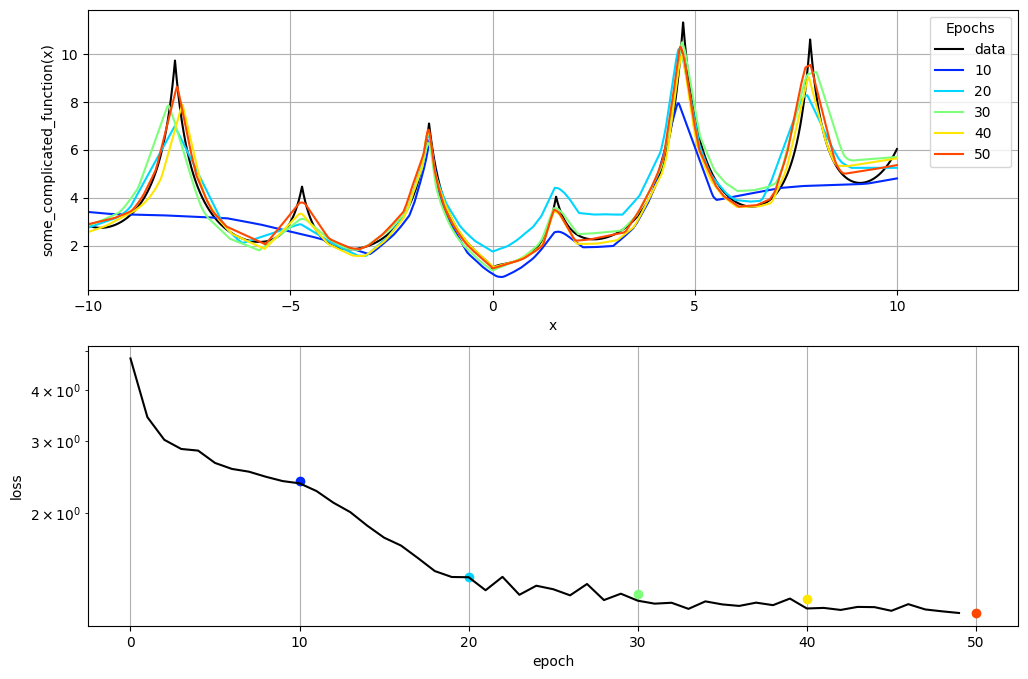

In [10]:
# create figure with two subplots for visualizing the training progress
fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (12, 8))

# plot original test data
ax1.plot(x_test, y_test, color = "black", label = "data")
saved_epochs = range(save_period, epochs + 1, save_period)

# define colors for each saved epoch
colors = [plt.cm.jet((i + 1) / float(len(saved_epochs) + 1)) for i in range(len(saved_epochs))]

# iterate over saved epochs to load model weights, make predictions, and plot results
for i, epoch in enumerate(saved_epochs):
    model.load_weights("{epoch:02d}.weights.h5".format(epoch = epoch))
    y_predict = model.predict(x_test).squeeze()

    # plot model predictions
    ax1.plot(x_test.squeeze(), y_predict, color = colors[i], label = epoch)

    # plot training loss over epochs
    ax2.plot(epoch, results.history["loss"][epoch - 1], color = colors[i], marker = "o")

# set labels, limits, and grid for first subplot
ax1.set(xlabel = "x", ylabel = "some_complicated_function(x)", xlim = (-10, 13), title = "")
ax1.grid(True)
ax1.legend(loc = "upper right", title = "Epochs")

# plot the overall training loss and set labels, limits and grid for second subplot
ax2.plot(results.history["loss"], color = "black")
ax2.set(xlabel = "epoch", ylabel = "loss")
ax2.grid(True)
ax2.semilogy()

# display results
plt.show()

In [11]:
# compute predicted value
x = 3
y_predict = model.predict(np.array([x]))

# print predicted and real value
print("")
print("Predicted value:", y_predict[0][0])
print("Real value:", some_complicated_function(x))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step

Predicted value: 2.456345
Real value: 2.4536098078602357
